In [237]:
import requests
from bs4 import BeautifulSoup
import pandas as pd
import time
import numpy as np

base_url = "https://www.webtoons.com/en/dailySchedule"
headers = {"User-Agent": "Mozilla/5.0"}

response = requests.get(base_url, headers=headers)
soup = BeautifulSoup(response.content, "html.parser")

In [238]:
import os

In [ ]:
# This will delete the entire folder and its contents recursively.
# import shutil

# shutil.rmtree('/content/webtoon_images')


In [240]:
# Create directory to save images
os.makedirs("webtoon_images", exist_ok=True)

# Final data lists
comics,titles, authors, ratings, descriptions,episodes,genres,votes,completed,image_url = [],[],[], [], [], [],[],[],[],[]
visited_comics = set()

# Step 1: Get all comic URLs from the daily page
# for i, comic_card in enumerate(soup.select(".daily_card_item")):
#     if i >= 3:
#         break

for i, comic_card in enumerate(soup.select(".daily_card_item")):
   # Skip if already visited
    if comic_card in visited_comics:
        continue

    visited_comics.add(comic_card)

    title = comic_card.select_one(".subj").get_text(strip=True)

    # Image from daily card
    img_tag = comic_card.select_one("img")
    img_url = img_tag.get("src") if img_tag else None

    if img_url and img_url.startswith("http"):
      try:
        response = requests.get(img_url)
        safe_title = title.replace(" ", "_").replace("/", "_")
        img_filename = f"webtoon_images/{safe_title}.jpg"
        with open(img_filename, "wb") as f:
          f.write(response.content)
        print(f"✅ Downloaded image: {img_filename}")
      except:
        img_filename = "N/A"
        print(f"❌ Failed to download image for {title}")
    else:
      img_filename = "N/A"

    genre = comic_card.select_one(".genre").get_text(strip=True)
    grade_tag = comic_card.select_one("p.grade_area em.grade_num")
    grade_text = grade_tag.get_text(strip=True) if grade_tag else "N/A"
    comic_url = comic_card.get("href")

    print(f"[{i+1}] Fetching: {title}")

    # Request the comic detail page
    comic_res = requests.get(comic_url, headers=headers,timeout=10)
    comic_soup = BeautifulSoup(comic_res.content, "html.parser")

    # Extract Author

    author = comic_soup.select_one(".author_area").get_text(strip=True)

    # # Extract Rating
    rating_tag = comic_soup.select_one("em#_starScoreAverage.cnt")
    rating = rating_tag.get_text(strip=True) if rating_tag else "N/A"

    # Extract episode numbers
    episode = comic_soup.select_one("._episodeItem  .tx").get_text(strip=True)

    #extract info about completion status of comic
    update = comic_soup.select_one("p.day_info").get_text(strip=True)

    # # Extract Description
    desc_tag = comic_soup.select_one(".detail_body .summary")
    description = desc_tag.get_text(strip=True) if desc_tag else "No description"

    # Store data
    image_url.append(img_url)
    comics.append(comic_url)
    completed.append(update)
    titles.append(title)
    genres.append(genre)
    authors.append(author)
    votes.append(grade_text)
    ratings.append(rating)
    episodes.append(episode)
    descriptions.append(description)


    # Be polite with delay (1 second)
    # time.sleep(1)

# Step 2: Save to DataFrame
df = pd.DataFrame({
    "Title": titles,
    "genre": genres,
    "Description": descriptions,
    "Author": authors,
    "Rating": ratings,
    "votes": votes,
    "Total_Episodes": episodes,
    'completion_status':completed,
    "links": comics ,
    "Img_url":image_url
})

# df.to_csv("webtoon_detailed_comics.csv", index=False)
print(f"✅ Scraped {len(df)} manga entries with full detail!")



✅ Downloaded image: webtoon_images/The_Beloved_Incompetent_Stepmom.jpg
[1] Fetching: The Beloved Incompetent Stepmom
✅ Downloaded image: webtoon_images/A_Savage_Proposal.jpg
[2] Fetching: A Savage Proposal
✅ Downloaded image: webtoon_images/The_Reborn_Young_Lord_is_an_Assassin.jpg
[3] Fetching: The Reborn Young Lord is an Assassin
✅ Downloaded image: webtoon_images/Duchess_in_Ruins.jpg
[4] Fetching: Duchess in Ruins
✅ Downloaded image: webtoon_images/The_Extra’s_Academy_Survival_Guide.jpg
[5] Fetching: The Extra’s Academy Survival Guide
✅ Downloaded image: webtoon_images/SubZero.jpg
[6] Fetching: SubZero
✅ Downloaded image: webtoon_images/I’m_the_Queen_in_This_Life.jpg
[7] Fetching: I’m the Queen in This Life
✅ Downloaded image: webtoon_images/Hidden_Class_Gravity_User.jpg
[8] Fetching: Hidden Class Gravity User
✅ Downloaded image: webtoon_images/The_Perfect_Contract.jpg
[9] Fetching: The Perfect Contract
✅ Downloaded image: webtoon_images/I_Grabbed_the_Leash_of_the_Blind_Beast.jpg
[10

In [242]:
print(comic_card.prettify())


<a class="daily_card_item NPI=a:complist,i=85,r=818" data-title-unsuitable-for-children="false" data-title-unsuitable-for-children-skin="harmful_white_skin1" href="https://www.webtoons.com/en/drama/family-man/list?title_no=85">
 <img alt="" height="138" src="https://webtoon-phinf.pstatic.net/20140710_210/1404979905975wQsyc_JPEG/34_ED8CA8EBB080EBA6ACEBA7A8.jpg?type=a138" width="138"/>
 <p class="genre g_drama">
  Drama
 </p>
 <div class="info">
  <p class="subj">
   FAMILY MAN
  </p>
  <p class="author">
   Pillwon Jung
  </p>
  <p class="icon_area">
  </p>
 </div>
 <p class="grade_area">
  <span class="ico_like3">
   like
  </span>
  <em class="grade_num">
   155,115
  </em>
 </p>
</a>



In [243]:
print(comic_soup.prettify())


<!DOCTYPE html>
<html lang="en">
 <head>
  <title>
   FAMILY MAN | WEBTOON
  </title>
  <meta content="FAMILY MAN, Drama, WEBTOON" name="keywords"/>
  <meta content="Read FAMILY MAN, List1 Now! Digital comics in LINE Webtoon, updated every Mon, Tue. When Gang-ho worked at the local factory, he slept only 3 hours a day and worked like a horse. However, after his face was burned in the fire, he is dismissed from his workplace., available online for free.#longlivecomics
" name="description"/>
  <link href="https://www.webtoons.com/en/drama/family-man/list?title_no=85" rel="canonical"/>
  <link href="https://m.webtoons.com/en/drama/family-man/list?title_no=85" media="only screen and (max-width: 640px)" rel="alternate"/>
  <meta charset="utf-8"/>
  <meta content="IE=edge" http-equiv="X-UA-Compatible">
   <link href="https://webtoons-static.pstatic.net/image/favicon/favicon.ico?dt=2017082301" rel="shortcut icon" type="image/x-icon"/>
   <link href="/static/bundle/linewebtoon-e7d6c68b8e2d4598

In [244]:
df.sample(3)

,Title,genre,Description,Author,Rating,votes,Total_Episodes,completion_status,links,Img_url
293,Momfluencer,Drama,How far would you go for fame and wealth? Fled...,Maemi\n\t\t\t\t\t\t\t\t\n\t\t\t\t\t\t\t\n\t\t\...,7.27,"50,900",#20,UPEVERY WEDNESDAY,https://www.webtoons.com/en/drama/momfluencer/...,https://webtoon-phinf.pstatic.net/20250305_256...
138,The Worst Villainess,Drama,Possessing a character in a fictional story is...,LICO\n\t\t\t\t\t\t\t\t\n\t\t\t\t\t\t\t\n\t\t\t...,9.50,"584,399",#51,UPEVERY TUESDAY,https://www.webtoons.com/en/drama/the-worst-vi...,https://webtoon-phinf.pstatic.net/20240709_269...
11,I'll Take That Marriage This Time,Romance,"Adored by her noble family, Saina Devof had a ...",pparappa\n\t\t\t\t\t\t\t\t\n\t\t\t\t\t\t\t\n\t...,9.08,"320,702",#22,UPEVERY MONDAY,https://www.webtoons.com/en/romance/ill-take-t...,https://webtoon-phinf.pstatic.net/20250213_145...


In [245]:
df.describe()

,Title,genre,Description,Author,Rating,votes,Total_Episodes,completion_status,links,Img_url
count,1594,1594,1594,1594,1594,1594,1594,1594,1594,1594
unique,1566,17,1565,1409,263,1094,246,17,1566,1566
top,Adventures of God,Romance,What if God was one of us? Perhaps God isn’t t...,Various Artistsauthor info,9.75,1.1M,#7,COMPLETED,https://www.webtoons.com/en/comedy/adventures-...,https://webtoon-phinf.pstatic.net/20250313_171...
freq,3,370,3,12,29,39,226,818,3,3


In [246]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1594 entries, 0 to 1593
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Title              1594 non-null   object
 1   genre              1594 non-null   object
 2   Description        1594 non-null   object
 3   Author             1594 non-null   object
 4   Rating             1594 non-null   object
 5   votes              1594 non-null   object
 6   Total_Episodes     1594 non-null   object
 7   completion_status  1594 non-null   object
 8   links              1594 non-null   object
 9   Img_url            1594 non-null   object
dtypes: object(10)
memory usage: 124.7+ KB


In [247]:
# Remove the exact phrase "author info" (case insensitive), then clean up extra spaces
df["Author"] = df["Author"].str.replace(r"author info", "", regex=True)
df["Author"] = df["Author"].str.replace(r"\s+", " ", regex=True).str.strip()

In [248]:
df["Total_Episodes"] = df["Total_Episodes"].str.replace("#", "").astype(int)


In [249]:
def parse_votes(v):
    if "M" in v:
        return float(v.replace("M", "")) * 1_000_000
    elif "K" in v:
        return float(v.replace("K", "")) * 1_000
    elif "B" in v:
        return float(v.replace("B", "")) * 1_000_000_000
    else:
        return float(v.replace(",", ""))

df["votes"] = df["votes"].apply(parse_votes)

In [250]:
df['Total_Episodes'] = df['Total_Episodes'].astype(int)
df['Rating'] = df['Rating'].astype(float)
df['votes'] = df['votes'].astype(int)

In [251]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1594 entries, 0 to 1593
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Title              1594 non-null   object 
 1   genre              1594 non-null   object 
 2   Description        1594 non-null   object 
 3   Author             1594 non-null   object 
 4   Rating             1594 non-null   float64
 5   votes              1594 non-null   int64  
 6   Total_Episodes     1594 non-null   int64  
 7   completion_status  1594 non-null   object 
 8   links              1594 non-null   object 
 9   Img_url            1594 non-null   object 
dtypes: float64(1), int64(2), object(7)
memory usage: 124.7+ KB


In [252]:
df.shape

(1594, 10)

In [253]:
df.size

15940

In [254]:
df.isnull().sum()

,0
Title,0
genre,0
Description,0
Author,0
Rating,0
votes,0
Total_Episodes,0
completion_status,0
links,0
Img_url,0


In [255]:
df.describe()

,Rating,votes,Total_Episodes
count,1594.000000,1.594000e+03,1594.000000
mean,9.197760,2.706605e+06,66.942911
std,0.718989,6.917764e+06,121.597516
min,3.860000,5.638000e+03,1.000000
25%,9.040000,2.209442e+05,8.000000
50%,9.400000,6.183870e+05,30.000000
75%,9.650000,2.100000e+06,78.750000
max,9.950000,7.540000e+07,1410.000000


In [256]:
df.to_csv("webtoon_detailed_comics.csv", index=False)
print(f"✅ Scraped {len(df)} comics and saved to 'webtoon_detailed_comics.csv'")


✅ Scraped 1594 comics and saved to 'webtoon_detailed_comics.csv'


In [257]:
df.sample(5)

,Title,genre,Description,Author,Rating,votes,Total_Episodes,completion_status,links,Img_url
735,Humanoido,Heartwarming,"Meet Ido Noh, a shy first-year high school stu...",hyung ju,9.65,124789,37,UPEVERY SUNDAY,https://www.webtoons.com/en/heartwarming/human...,https://webtoon-phinf.pstatic.net/20241017_236...
472,One Husband Is Enough,Romance,A girl who has been alone her whole life stumb...,Go Sun Young,8.16,720845,45,UPEVERY FRIDAY,https://www.webtoons.com/en/romance/one-husban...,https://webtoon-phinf.pstatic.net/20240822_83/...
539,That Which Flows By,Historical,"Dani, a Jurchen girl who was saved by General ...","softcorn , Eunbi Lee",9.72,1100000,82,UPEVERY FRIDAY,https://www.webtoons.com/en/historical/that-wh...,https://webtoon-phinf.pstatic.net/20230725_14/...
368,Raising Hell: A Demon's Guide to Parenting,Comedy,What if the foretold hero of prophecy crosses ...,"MANNA, KaiE, Mevos, ianzhou",9.37,222781,17,UPEVERY THURSDAY,https://www.webtoons.com/en/comedy/raising-hel...,https://webtoon-phinf.pstatic.net/20241218_5/1...
42,The Barbarian of Seoul Station,Action,"Cheoldu, a barbarian raised on Earth, lives a ...","LICO , Jin Seol woo",8.75,163486,30,UPEVERY MONDAY,https://www.webtoons.com/en/action/the-barbari...,https://webtoon-phinf.pstatic.net/20241025_85/...


In [258]:
df.duplicated().sum()

np.int64(28)

In [259]:
duplicates = df[df.duplicated()]
print(duplicates)

                                            Title          genre  \
236                       My Giant Nerd Boyfriend  Slice of life   
381                                Mage and Mimic         Comedy   
391                             Adventures of God         Comedy   
399                      Ingrid the Plague Doctor  Slice of life   
402                                Mono and Mochi         Comedy   
466                             Stalker x Stalker         Comedy   
467                       My Giant Nerd Boyfriend  Slice of life   
482                        Puppies and Werewolves         Comedy   
490                                   Paperteeth!         Comedy   
505                  Demon Prince & The Salaryman         Comedy   
530                                      1HP Club        Fantasy   
560  From Old Country Bumpkin to Master Swordsman  Graphic Novel   
563                             Clinic of Horrors   Supernatural   
570                                Just Roommate

In [260]:
df = df.drop_duplicates()

In [261]:
df.duplicated().sum()

np.int64(0)

In [262]:
# Fill any missing with 0
df['Rating'] = df['Rating'].fillna(0)
df['votes'] = df['votes'].fillna(0)

In [263]:
import seaborn as sns
import matplotlib.pyplot as plt

<Axes: xlabel='count', ylabel='genre'>

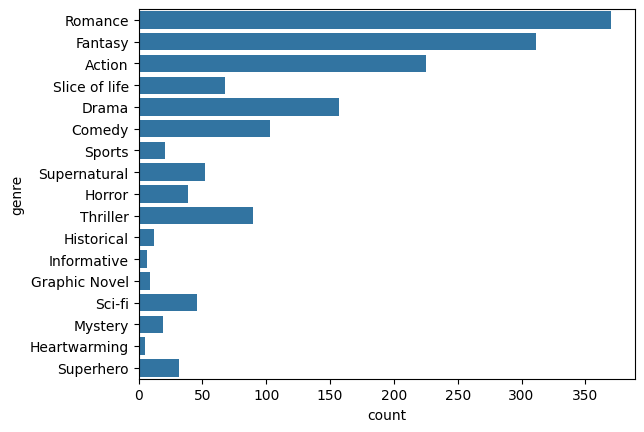

In [264]:
sns.countplot(df['genre'])

<Axes: ylabel='count'>

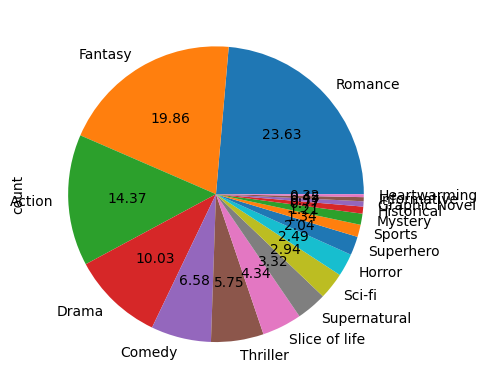

In [265]:
df['genre'].value_counts().plot(kind='pie',autopct='%.2f')

(array([1.434e+03, 8.600e+01, 1.700e+01, 1.300e+01, 5.000e+00, 4.000e+00,
        1.000e+00, 2.000e+00, 2.000e+00, 2.000e+00]),
 array([5.63800000e+03, 7.54507420e+06, 1.50845104e+07, 2.26239466e+07,
        3.01633828e+07, 3.77028190e+07, 4.52422552e+07, 5.27816914e+07,
        6.03211276e+07, 6.78605638e+07, 7.54000000e+07]),
 <BarContainer object of 10 artists>)

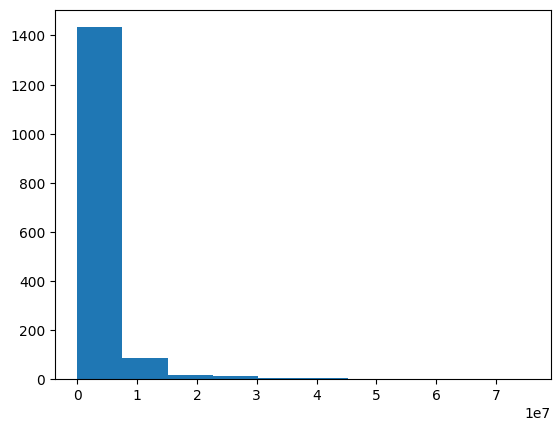

In [266]:
plt.hist(df['votes'])

<Axes: xlabel='Rating', ylabel='Total_Episodes'>

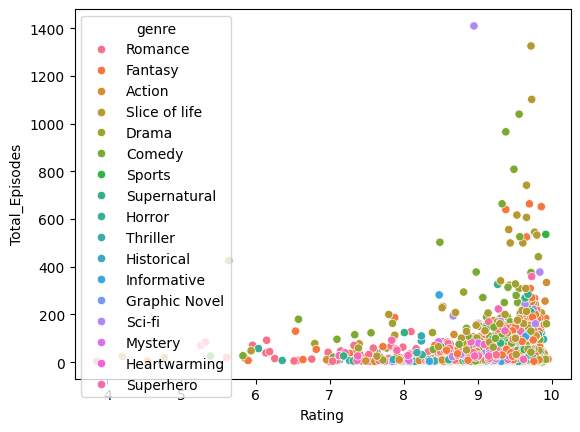

In [267]:
sns.scatterplot(x=df['Rating'], y=df['Total_Episodes'], hue=df["genre"])


<Axes: xlabel='genre', ylabel='Rating'>

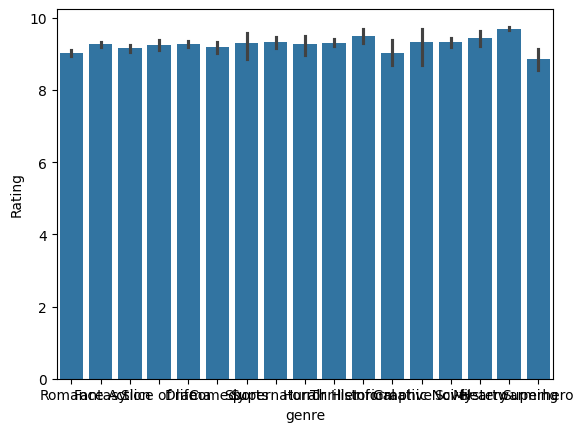

In [268]:
sns.barplot(x=df['genre'], y=df['Rating'])

In [269]:
!pip install ydata-profiling

In [272]:
from ydata_profiling import ProfileReport
data=df.iloc[:,0:8]
prof = ProfileReport(data, title="webtoon_profile")
prof.to_file(output_file='webtoon_output.html')

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]


100%|██████████| 8/8 [00:00<00:00, 17.27it/s]


Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

**Popularity Based Recommender System**


select the popular books who have at least 2517495(mean no. of votes)

In [280]:
popular_df = df[df['votes']>= 2517495].sort_values('votes',ascending=False).head(50).reset_index().drop('index',axis=1)

In [306]:
popular_df.sample(5)

,Title,genre,Description,Author,Rating,votes,Total_Episodes,completion_status,links,Img_url
20,Down To Earth,Romance,Kade lives his average life alone and undistur...,Pookie Senpai,9.72,26400000,231,UPEVERY TUESDAY,https://www.webtoons.com/en/romance/down-to-ea...,https://webtoon-phinf.pstatic.net/20210329_28/...
11,Omniscient Reader,Action,Dokja was an average office worker whose sole ...,"singNsong , UMI ...",9.91,37600000,256,UPEVERY TUESDAY,https://www.webtoons.com/en/action/omniscient-...,https://webtoon-phinf.pstatic.net/20230524_172...
36,Weak Hero,Action,"Once the bullies target you, it’s game over. T...","SEOPASS , RAZEN",9.83,17700000,8,COMPLETED,https://www.webtoons.com/en/action/weakhero/li...,https://webtoon-phinf.pstatic.net/20210331_280...
44,My Deepest Secret,Thriller,"Having a handsome, kind and caring boyfriend l...",Hanza Art,9.62,15900000,11,COMPLETED,https://www.webtoons.com/en/thriller/my-deepes...,https://webtoon-phinf.pstatic.net/20190426_80/...
30,Noblesse,Action,Rai wakes up from an 820-year-long sleep and s...,"Jeho Son , Kwangsu Lee",9.77,22200000,50,COMPLETED,https://www.webtoons.com/en/action/noblesse/li...,https://webtoon-phinf.pstatic.net/20151006_104...


top rated books in each genre

In [282]:
top_rated_per_genre = df.loc[df.groupby('genre')['Rating'].idxmax()].reset_index()

print("Top Rated Comics by Genre:")
print(top_rated_per_genre[['genre', 'Title', 'Rating']])


Top Rated Comics by Genre:
            genre                                   Title  Rating
0          Action                                 Eleceed    9.93
1          Comedy                          Vampire Family    9.86
2           Drama  After School Lessons for Unripe Apples    9.93
3         Fantasy                  On the Way to Meet Mom    9.95
4   Graphic Novel                     Fullmetal Alchemist    9.89
5    Heartwarming                         The Memory Shop    9.80
6      Historical                          Miss Pendleton    9.84
7          Horror                            Ghost Teller    9.86
8     Informative                Staying Healthy Together    9.71
9         Mystery                         Purple Hyacinth    9.91
10        Romance                      Seasons of Blossom    9.89
11         Sci-fi                               Space Boy    9.84
12  Slice of life                      Mr. Tiger's Snacks    9.87
13         Sports                            Wind

In [311]:
def recommend_top_10_by_genre(selected_genre):
    filtered = df[df['genre'].str.lower() == selected_genre.lower()]
    top_10 = filtered.sort_values('votes', ascending=False).head(10).reset_index(drop=True)

    print(f"\nTop 10 Liked Comics in Genre: {selected_genre}")
    print(top_10[['Title', 'votes', 'Rating',"completion_status"]])

    return top_10


In [312]:
recommend_top_10_by_genre('Romance')


Top 10 Liked Comics in Genre: Romance
                 Title     votes  Rating completion_status
0         Lore Olympus  72500000    9.57         COMPLETED
1          True Beauty  55600000    9.47         COMPLETED
2           Let's Play  42700000    9.56         COMPLETED
3          Age Matters  29300000    9.77         COMPLETED
4              SubZero  27700000    9.75    UPEVERY MONDAY
5        Down To Earth  26400000    9.72   UPEVERY TUESDAY
6       Siren's Lament  24100000    9.74         COMPLETED
7     Freaking Romance  21400000    9.74         COMPLETED
8         The Kiss Bet  17200000    9.69  UPEVERY SATURDAY
9  Midnight Poppy Land  16800000    9.77  UPEVERY SATURDAY


,Title,genre,Description,Author,Rating,votes,Total_Episodes,completion_status,links,Img_url
0,Lore Olympus,Romance,Witness what the gods do…after dark. The frien...,Rachel Smythe,9.57,72500000,9,COMPLETED,https://www.webtoons.com/en/romance/lore-olymp...,https://webtoon-phinf.pstatic.net/20210329_113...
1,True Beauty,Romance,"After binge-watching beauty videos online, a s...",Yaongyi,9.47,55600000,8,COMPLETED,https://www.webtoons.com/en/romance/truebeauty...,https://webtoon-phinf.pstatic.net/20210129_65/...
2,Let's Play,Romance,"She’s young, single and about to achieve her d...",Leeanne M. Krecic (Mongie),9.56,42700000,182,COMPLETED,https://www.webtoons.com/en/romance/letsplay/l...,https://webtoon-phinf.pstatic.net/20210629_163...
3,Age Matters,Romance,She’s a hopeless romantic who’s turning 30 – a...,Enjelicious,9.77,29300000,14,COMPLETED,https://www.webtoons.com/en/romance/age-matter...,https://webtoon-phinf.pstatic.net/20210329_171...
4,SubZero,Romance,What would you sacrifice to save your family? ...,Junepurrr,9.75,27700000,227,UPEVERY MONDAY,https://www.webtoons.com/en/romance/subzero/li...,https://webtoon-phinf.pstatic.net/20181022_300...
5,Down To Earth,Romance,Kade lives his average life alone and undistur...,Pookie Senpai,9.72,26400000,231,UPEVERY TUESDAY,https://www.webtoons.com/en/romance/down-to-ea...,https://webtoon-phinf.pstatic.net/20210329_28/...
6,Siren's Lament,Romance,"Content with her ordinary life, Lyra is somewh...",instantmiso,9.74,24100000,26,COMPLETED,https://www.webtoons.com/en/romance/sirens-lam...,https://webtoon-phinf.pstatic.net/20160408_102...
7,Freaking Romance,Romance,A sexy supernatural story about being out on y...,Snailords,9.74,21400000,16,COMPLETED,https://www.webtoons.com/en/romance/freaking-r...,https://webtoon-phinf.pstatic.net/20210329_236...
8,The Kiss Bet,Romance,It’s senior year and Sara Lin just turned 18. ...,Ingrid Ochoa,9.69,17200000,206,UPEVERY SATURDAY,https://www.webtoons.com/en/romance/the-kiss-b...,https://webtoon-phinf.pstatic.net/20200606_156...
9,Midnight Poppy Land,Romance,After making a grisly discovery in the country...,Lilydusk,9.77,16800000,129,UPEVERY SATURDAY,https://www.webtoons.com/en/romance/midnight-p...,https://webtoon-phinf.pstatic.net/20191119_163...


In [209]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity


# Fill missing descriptions if any
df['Description'] = df['Description'].fillna("")

tfidf = TfidfVectorizer(stop_words='english')
tfidf_matrix = tfidf.fit_transform(df['Description'])

cosine_sim = cosine_similarity(tfidf_matrix, tfidf_matrix)
indices = pd.Series(df.index, index=df['Title']).drop_duplicates()


In [313]:
def recommend_comics(title, num_recommendations=10):
    if title not in indices:
        return f"Comic '{title}' not found in dataset."

    idx = indices[title]
    sim_scores = list(enumerate(cosine_sim[idx]))
    sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)[1:num_recommendations+1]

    comic_indices = [i[0] for i in sim_scores]
    return df[['Title', 'Author', 'genre', 'Rating','completion_status']].iloc[comic_indices].reset_index(drop=True)


In [314]:
recommend_comics("The Mafia Nanny")


,Title,Author,genre,Rating,completion_status
0,My Deepest Secret,Hanza Art,Thriller,9.62,COMPLETED
1,What Death Taught Me,"LICO , Eun Ragyeom",Romance,8.69,UPEVERY TUESDAY
2,Trump,Chaeeun Lee,Fantasy,9.53,COMPLETED
3,Momfluencer,"Maemi , Hee Se",Drama,7.27,UPEVERY WEDNESDAY
4,How to Love,Dorris McComics,Slice of life,9.51,COMPLETED
5,The Blind Prince,cozycroww,Romance,9.76,UPEVERY WEDNESDAY
6,"Unnie, I Like You!",Jeongussi,Drama,9.26,UPEVERY WEDNESDAY
7,Love Me Knot,Sophia,Romance,9.31,UPEVERY WEDNESDAY
8,Faust,Arechan,Supernatural,8.01,COMPLETED
9,The Demon King's Warrior Daughter,"Geobong Choi , Ppangbaksa ...",Fantasy,9.35,UPEVERY THURSDAY


In [291]:
df.to_pickle('comics.pkl')



---



---



# **For future work**

In [292]:
top_comics_each_genre = df.groupby('genre').apply(
    lambda x: x.groupby('Title').agg(
        avg_rating=('Rating', 'mean'),
        num_ratings=('Rating', 'count'),
        Author=('Author', 'first')
    ).sort_values(by='avg_rating', ascending=False).head(1)
).reset_index()


<ipython-input-292-0ec81cd64239>:1: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  top_comics_each_genre = df.groupby('genre').apply(


In [295]:
top_comics_each_genre

,genre,Title,avg_votes,num_votes,Author
0,Action,Omniscient Reader,37600000.0,1,"singNsong , UMI ..."
1,Comedy,Adventures of God,35400000.0,1,"Teo,Corey"
2,Drama,Lookism,56200000.0,1,Taejun Pak
3,Fantasy,Tower of God,64500000.0,1,SIU
4,Graphic Novel,Darbi,3000000.0,1,Sherard Jackson
5,Heartwarming,HEART Anthology,1900000.0,1,"Marvin.W , caw-chan ..."
6,Historical,Return of the Mad Demon,4200000.0,1,"JP , Ihy ..."
7,Horror,Tales of the Unusual,10300000.0,1,Seongdae Oh
8,Informative,WEBTOON Now,2400000.0,1,"Wyatt the Cat, LOZOLZ"
9,Mystery,Purple Hyacinth,16900000.0,1,"Ephemerys,Sophism"


In [201]:
def top_10_comics_by_genre(genre):
    genre_comics = df[df['genre'] == genre]
    top_comics = genre_comics.groupby('Title').agg(
        avg_rating=('Rating', 'mean'),
        num_ratings=('Rating', 'count'),
        Author=('Author', 'first')
    ).sort_values(by='avg_rating', ascending=False).head(10)
    return top_comics.reset_index()


In [202]:
top_10_comics_by_genre("Action")


,Title,avg_rating,num_ratings,Author
0,Eleceed,9.93,1,"Jeho Son , ZHENA"
1,Omniscient Reader,9.91,1,"singNsong , UMI ..."
2,Return of the Blossoming Blade,9.90,1,"LICO , Biga"
3,Special Civil Servant,9.90,1,"Kwon Sora , Seo Jaewon ..."
4,The Black Serpent,9.89,1,angyungal
5,Ordeal,9.85,1,Brent Bristol
6,GOSU,9.84,1,"Giun Ryu , Mun Jeong Hoo"
7,Noblesse: Rai's Adventure,9.83,1,"Jeho Son , Kwangsu Lee"
8,Weak Hero,9.83,1,"SEOPASS , RAZEN"
9,Teenage Mercenary,9.81,1,"YC , Rakyeon"


In [203]:
pt = df.pivot_table(index='Title', values='Rating')
pt.fillna(0, inplace=True)

from sklearn.metrics.pairwise import cosine_similarity
similarity_scores = cosine_similarity(pt)


In [296]:
similarity_scores

array([[1., 1., 1., ..., 1., 1., 1.],
       [1., 1., 1., ..., 1., 1., 1.],
       [1., 1., 1., ..., 1., 1., 1.],
       ...,
       [1., 1., 1., ..., 1., 1., 1.],
       [1., 1., 1., ..., 1., 1., 1.],
       [1., 1., 1., ..., 1., 1., 1.]])

In [204]:
def recommend_comics(comic_title):
    if comic_title not in pt.index:
        print(f"❌ Comic '{comic_title}' not found in pivot table.")
        return []

    index = np.where(pt.index == comic_title)[0][0]
    similar_items = sorted(list(enumerate(similarity_scores[index])), key=lambda x: x[1], reverse=True)[1:6]

    recommendations = []
    for i in similar_items:
        comic_name = pt.index[i[0]]
        author = df[df['Title'] == comic_name]['Author'].iloc[0]
        genre = df[df['Title'] == comic_name]['genre'].iloc[0]
        recommendations.append([comic_name, author, genre])
    return recommendations


In [205]:
recommend_comics("Attack on Titan")


❌ Comic 'Attack on Titan' not found in pivot table.


[]

In [206]:
from difflib import get_close_matches

def recommend_comics(comic_title):
    # Fuzzy match the closest title
    matched_title = get_close_matches(comic_title, pt.index, n=1, cutoff=0.6)

    if not matched_title:
        print(f"❌ No similar title found for '{comic_title}'. Try another name.")
        return []

    matched_title = matched_title[0]  # Use the closest match
    print(f"🔍 Using closest match: '{matched_title}'")

    index = np.where(pt.index == matched_title)[0][0]
    similar_items = sorted(list(enumerate(similarity_scores[index])), key=lambda x: x[1], reverse=True)[1:6]

    recommendations = []
    for i in similar_items:
        comic_name = pt.index[i[0]]
        author = df[df['Title'] == comic_name]['Author'].iloc[0]
        genre = df[df['Title'] == comic_name]['genre'].iloc[0]
        recommendations.append([comic_name, author, genre])

    return recommendations


In [207]:
recommend_comics("mafia nanny")

🔍 Using closest match: 'The Mafia Nanny'


[['#Killstagram', 'Ryoung', 'Thriller'],
 ['#muted', 'kandismon', 'Romance'],
 ["'Til Debt Do Us Part", 'janggreen , Flowbee', 'Romance'],
 ['+99 Reinforced Wooden Stick', 'HONGSIL , JIPERY', 'Comedy'],
 ['1 Second', 'sini , kwang woon', 'Action']]

In [143]:
pickle.dump(pt,open('pt.pkl','wb'))
pickle.dump(similarity_scores,open('similarity.pkl','wb'))

NameError: name 'pickle' is not defined